In [68]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [69]:
X, y= make_regression(n_samples= 100, n_features=1, n_informative=1, n_targets= 1, noise = 20)
print(X, y)

[[ 0.51296738]
 [-0.24653885]
 [ 1.05578032]
 [-1.91104494]
 [-0.22797793]
 [-0.45740054]
 [-1.52408322]
 [-1.17488564]
 [-0.25323413]
 [-1.8358527 ]
 [ 0.84941532]
 [-0.90546173]
 [ 1.21971348]
 [-0.71862414]
 [-0.36971764]
 [-0.45913029]
 [-0.68400745]
 [-1.03154765]
 [ 0.60756869]
 [ 0.02773249]
 [-1.99303797]
 [-0.05047443]
 [ 0.48879351]
 [-0.40200511]
 [-2.00612136]
 [ 0.55569599]
 [-0.85777594]
 [ 1.5654162 ]
 [ 0.72365484]
 [-1.40708898]
 [ 0.01197794]
 [ 0.87821199]
 [-1.11030396]
 [ 0.01017512]
 [ 0.17426077]
 [ 0.05852003]
 [ 1.06635106]
 [ 0.15996174]
 [ 0.78420503]
 [-0.10686427]
 [ 0.59651718]
 [ 1.2115169 ]
 [-1.39650264]
 [-0.28152616]
 [ 0.54982571]
 [ 0.04752621]
 [-2.64902233]
 [ 0.39260356]
 [ 0.10672515]
 [ 0.17786659]
 [-0.86513145]
 [-1.0628718 ]
 [ 1.10573799]
 [-1.87674922]
 [-2.30014302]
 [ 1.41746892]
 [ 0.25674857]
 [-1.21055015]
 [-0.47974106]
 [-0.0723373 ]
 [ 0.02846264]
 [-1.78743962]
 [ 1.05760988]
 [-0.67598751]
 [ 0.75550439]
 [ 0.99918651]
 [ 1.07627

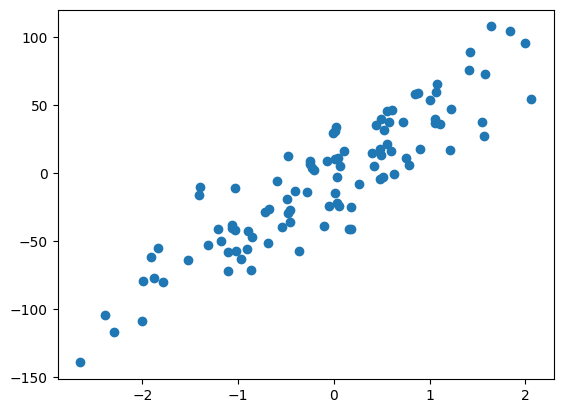

In [70]:
plt.scatter(X, y)

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [86]:
reg = LinearRegression()
reg.fit(X_train, y_train)
print(reg.coef_)
print(reg.intercept_)

[43.13707497]
-2.778648932305686


In [72]:
np.mean(cross_val_score(reg, X, y, scoring='r2', cv= 10))

np.float64(0.7609477741966038)

In [89]:
class GDRegressor:
    def __init__(self, learning_rate, epochs):
        self.m = 42.90
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self, X, y ):
        for _ in range(self.epochs):
            print("Epoch :", _)
            loss_slope_b = -2 * np.sum(y - self.m*X.ravel() - self.b)
            loss_slope_m = -2 * np.sum((y - self.m*X.ravel() - self.b)* X.ravel())

            self.b = self.b -(self.lr * loss_slope_b)
            self.m = self.m - (self.lr * loss_slope_m)

            print(f"b : {self.b}")
            print(f"loss_slope_b = {loss_slope_b}")
            print(f"loss_slope_m = {loss_slope_m}")
        print(f"b: {self.b}, m :{self.m}")
        
    def predict(self, X_test):
        return self.m * X_test - self.b


In [91]:
gdr = GDRegressor(0.001, 40)

gdr.fit(X_train, y_train)

y_pred = gdr.predict(X_test)
y_pred

Epoch : 0
b : -101.24771801130068
loss_slope_b = -18752.281988699324
loss_slope_m = 1509.223071836283
Epoch : 1
b : -85.5157533945596
loss_slope_b = -15731.964616741076
loss_slope_m = 1003.6913011512436
Epoch : 2
b : -72.31417213147398
loss_slope_b = -13201.581263085616
loss_slope_m = 624.3824427772383
Epoch : 3
b : -61.23309834073105
loss_slope_b = -11081.073790742936
loss_slope_m = 343.2733638736919
Epoch : 4
b : -51.92953450424342
loss_slope_b = -9303.563836487623
loss_slope_m = 138.1828325528341
Epoch : 5
b : -44.11636768837454
loss_slope_b = -7813.1668158688835
loss_slope_m = -8.39992704926621
Epoch : 6
b : -37.553196514201574
loss_slope_b = -6563.171174172962
loss_slope_m = -110.25781613358066
Epoch : 7
b : -32.03867509584157
loss_slope_b = -5514.521418360001
loss_slope_m = -178.20347439751805
Epoch : 8
b : -27.404121216141565
loss_slope_b = -4634.553879700003
loss_slope_m = -220.68751489273816
Epoch : 9
b : -23.50817842075884
loss_slope_b = -3895.9427953827258
loss_slope_m = -24

array([[-111.21044862],
       [ -76.17981081],
       [   3.42311953],
       [  48.84459257],
       [ -36.09938037],
       [ -49.24232316],
       [   2.49771893],
       [ -57.70904428],
       [  -0.20910762],
       [   9.79813239],
       [  55.45131177],
       [   3.81111532],
       [  -6.22263759],
       [  48.38921446],
       [  29.08064875],
       [  25.00530686],
       [ -39.11458453],
       [  -7.71355829],
       [  23.98737449],
       [  91.62782134]])

In [93]:
r2_score(y_test, y_pred)

0.7553929680851069